<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/parameter_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import beta, norm

from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, fill_between, vlines, hlines

In [2]:
leftEdge = 0.00001
rightEdge = 1-leftEdge

In [3]:
def plot_ci(rv, ci, variable):
  [left, right] = rv.ppf([leftEdge, rightEdge])
  leftCI = (1-ci)/2
  rightCI = 1 - leftCI

  ps = np.linspace(left, right, 200)
  [leftPercentile, rightPercentile] = rv.ppf([leftCI, rightCI])

  median = rv.median()
  print('mean: ', rv.mean(), ' median: ', median)
  print('leftCI', leftCI, 'rightCI', rightCI)
  print(ci*100, ' percent confidence interval', leftPercentile, ' to ', rightPercentile)

  fig, (pdf_ax, cdf_ax) = plt.subplots(2, 1, figsize=(12,12))
  pdf_ax.set_xlabel(variable)
  pdf_ax.set_ylabel('Density')

  cdf_ax.set_xlabel(variable)
  cdf_ax.set_ylabel('Cumulative Probability')

  pdf_ax.plot(ps, rv.pdf(ps))
  pdf_ax.vlines(leftPercentile, 0, rv.pdf(leftPercentile))
  pdf_ax.vlines(median, 0, rv.pdf(median), colors='red')
  pdf_ax.vlines(rightPercentile, 0, rv.pdf(rightPercentile))

  print('Probability ', leftPercentile, ' < ', variable, ' < ', rightPercentile, ' = ', rv.cdf(rightPercentile) - rv.cdf(leftPercentile))

  cdf_ax.plot(ps, rv.cdf(ps))
  cdf_ax.hlines(leftCI, left, leftPercentile)
  cdf_ax.vlines(leftPercentile, 0, leftCI)

  cdf_ax.hlines(0.5, left, median, colors='red')
  cdf_ax.vlines(median, 0, 0.5, colors='red')

  cdf_ax.hlines(rightCI, left, rightPercentile)
  cdf_ax.vlines(rightPercentile, 0, rightCI)


## Few Successes

mean:  0.0075  median:  0.007491793171661221
leftCI 0.04999999999999999 rightCI 0.95
90.0  percent confidence interval 0.0068047141226151575  to  0.00822328065362432
Probability  0.0068047141226151575  <  trial p  <  0.00822328065362432  =  0.9000000000000354


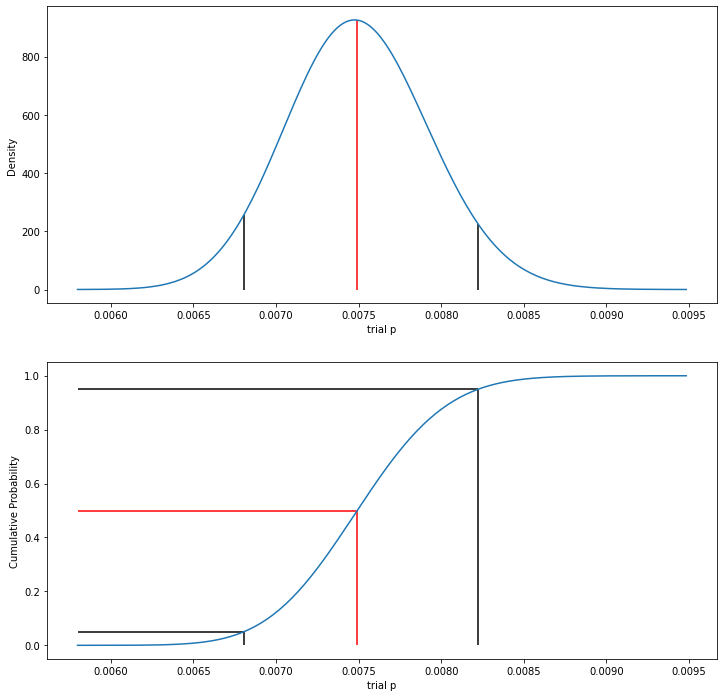

In [4]:
rv = beta(300, 39700)
plot_ci(rv, 0.9, 'trial p')

## Skewed right

mean:  0.9090909090909091  median:  0.9173098400475259
leftCI 0.04999999999999999 rightCI 0.95
90.0  percent confidence interval 0.8160565318230713  to  0.9739569539514824
Probability  0.8160565318230713  <  trial p  <  0.9739569539514824  =  0.9


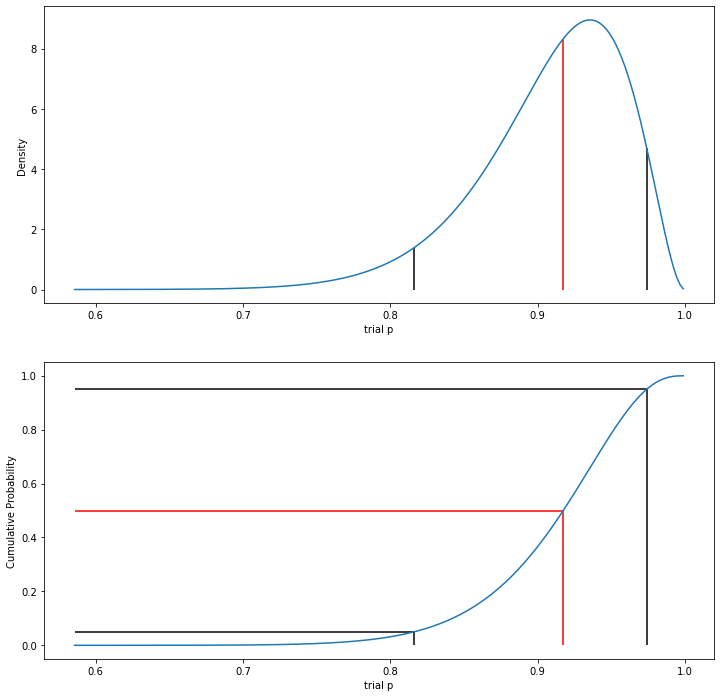

In [5]:
rv = beta(30, 3)
plot_ci(rv, 0.9, 'trial p')

## estimate using normal distribution

In [6]:
heights = [7.8, 9.4, 10, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]
μ = np.mean(heights)
σ = np.std(heights)
rv = norm(μ, σ)

mean:  8.190000000000001  median:  8.190000000000001
leftCI 0.0005000000000000004 rightCI 0.9995
99.9  percent confidence interval 4.64767499582816  to  11.732325004171877
Probability  4.64767499582816  <  height  <  11.732325004171877  =  0.999


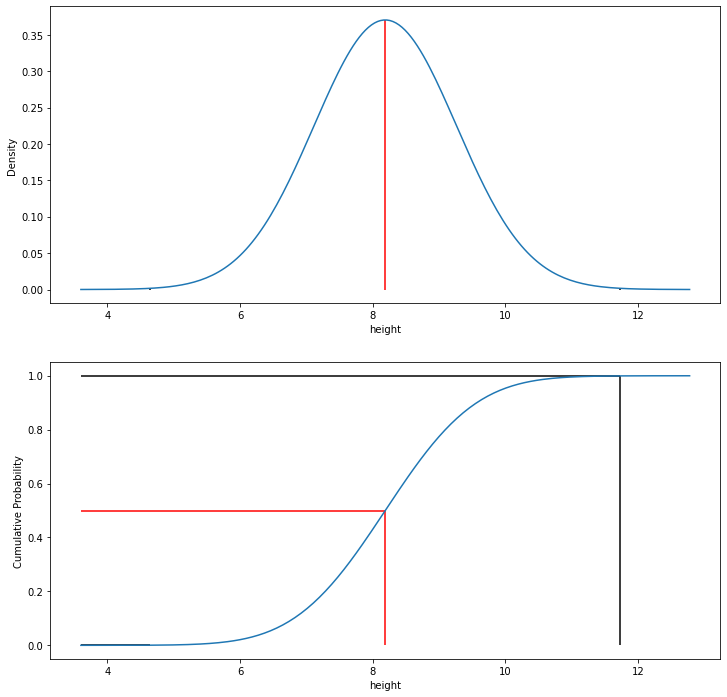

In [7]:
plot_ci(rv, 0.999, 'height')